# Table of contents

* [Data_Visualization](#data_visualization)
    * [Fist imports](#first_imports)
    * [Download the dataset](#dowload_dataset)
    * [Checks on the dataset](#checks_on_dataset)
    * [Semeron](#semeron)
    * [Check of the distribution](#check_distrib)
        * [Per country](#per_country)
        * [Per ethnicity](#per_ethnicity)
        * [Per age](#per_age)
        * [Per gender](#per_gender)
        * [Per education](#per_education)
        * [Age-Gender distribution](#age_gender_distrib)
        * [Country-Gender distribution](#country_gender_distrib)
        * [Education-Gender distribution](#education_gender_distrib)
        * [Ethnicity-Gender distribution](#ethnicity_gender_distrib)
        * [Age-Gender-Country crosstable](#age_gender_country_crosstable)
        * [Education-Gender-Ethnicity crosstable](#education_gender_ethnicity_crosstable)
        * [Country-Gender-Ethnicity crosstable](#country_gender_ethnicity_crosstable)
    * [The seven classes / Drug consumption overview](#seven_classes_drug_overview)
        * [Overview of all the drugs](#drugs_overview)
        * [Personality measurements](#personality_measurements)
        * [Correlation between the heroin consumption and the personality measurements](#correl_heroin_personality)
            * [With Neuroticism](#with_neuroticism)
            * [With Extraversion](#with_extraversion)
            * [With Openness to experience](#with_openness)
            * [With Agreeableness](#with_agreeableness)
            * [With  Conscientiousness](#with_conscientiousness)
            * [With Impulsiveness](#with_impulsiveness)
            * [With Sensation seeking](#with_sensation_seeking)
* [Problem resolution](#problem_resolution)
    * [The seven classes](#seven_classes)
    * [Binary classification](#binary_classification)
        * [Two classes: "Non-user" and "User"](#non_user_user)
        * [P-values : correlation between drugs consumption and personality traits](#p_values)
        * [Association rules](#association_rules)
    * [Modelling](#modelling)
        * [Alcohol consumption](#alcohol_consumption)
            * [Encoding the categorical features](#encoding_categorical_features)
            * [Logistic regression model](#alcohol_logistic_reg)
            * [Neural network model](#alcohol_neural_network)
            * [Stochastic gradient descent model](#alcohol_stochastic)
            * [The K Nearest Neighbors (K-NN) model](#alcohol_knn)
            * [Decision trees model](#alcohol_decision_trees)
                * [GridSearch & KFold](#gridsearch)
        * [Check of the results](#check_results)
        * [Amphetamines consumption](#amphetamines_consumption)
        * [Amyl nitrite consumption](#amyl_nitrite_consumption)
        * [Benzodiazepine consumption](#benzodiazepine_consumption)
        * [Caffeine consumption](#caffeine_consumption)
        * [Cannabis consumption](#cannabis_consumption)
        * [Chocolate consumption](#chocolate_consumption)
        * [Cocaine consumption](#cocaine_consumption)
        * [Crack consumption](#crack_consumption)
        * [Ecstasy consumption](#ecstasy_consumption)
        * [Heroin consumption](#heroin_consumption)
        * [Ketamine consumption](#ketamine_consumption)
        * [Legal highs consumption](#legal_highs_consumption)
        * [Lysergic acid diethylamide consumption](#lysergic_acid_diethylamide_consumption)
        * [Methadone consumption](#methadone_consumption)
        * [Magic mushrooms consumption](#magic_mushrooms_consumption)
        * [Nicotine consumption](#nicotine_consumption)
        * [Volatile substance abuse consumption](#volatile_substance_abuse_consumption)
* [API](#api)
    * [Saving the models](#saving_models)
    * [Cleaning the model](#cleaning_model)
    * [Flask API](#flask_api)
    * [Test](#test)

# Data-Visualization <a class="anchor" id="data_visualization"></a>

### First imports  <a class="anchor" id="first_imports"></a>

In [466]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6, Spectral5
from cleaning_dataset import cleaning, encoding
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from plotnine import *
from plotnine.data import *
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import requests
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

### Download the dataset <a class="anchor" id="download_dataset"></a>

In [2]:
all_columns = [
    'ID', 
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking',
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

demographic_columns = [
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
]

personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

drugs_columns = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

In [3]:
data = pd.read_csv('drug_consumption.data', header=None, names=all_columns)
data.shape

(1885, 32)

### Checks on the dataset <a class="anchor" id="checks_on_dataset"></a>

In [4]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
data.isna().sum()

ID                                        0
Age                                       0
Gender                                    0
Education                                 0
Country                                   0
Ethnicity                                 0
Neuroticism                               0
Extraversion                              0
Openness to experience                    0
Agreeableness                             0
Conscientiousness                         0
Impulsiveness                             0
Sensation seeking                         0
Alcohol consumption                       0
Amphetamines consumption                  0
Amyl nitrite consumption                  0
Benzodiazepine consumption                0
Caffeine consumption                      0
Cannabis consumption                      0
Chocolate consumption                     0
Cocaine consumption                       0
Crack consumption                         0
Ecstasy consumption             

##### Our dataset is far from being easy to read and understand. Let's make it more clear and convert nominal drug values into ordered data.

In [6]:
for i in drugs_columns:
    data[i] = data[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

In [7]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


In [8]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness to experience',
       'Agreeableness', 'Conscientiousness', 'Impulsiveness',
       'Sensation seeking', 'Alcohol consumption', 'Amphetamines consumption',
       'Amyl nitrite consumption', 'Benzodiazepine consumption',
       'Caffeine consumption', 'Cannabis consumption', 'Chocolate consumption',
       'Cocaine consumption', 'Crack consumption', 'Ecstasy consumption',
       'Heroin consumption', 'Ketamine consumption', 'Legal highs consumption',
       'Lysergic acid diethylamide consumption', 'Methadone consumption',
       'Magic mushrooms consumption', 'Nicotine consumption',
       'Fictitious drug Semeron consumption',
       'Volatile substance abuse consumption'],
      dtype='object')

In [9]:
data.dtypes

ID                                          int64
Age                                       float64
Gender                                    float64
Education                                 float64
Country                                   float64
Ethnicity                                 float64
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeking                         float64
Alcohol consumption                         int64
Amphetamines consumption                    int64
Amyl nitrite consumption                    int64
Benzodiazepine consumption                  int64
Caffeine consumption                        int64
Cannabis consumption                        int64
Chocolate consumption                       int64


In [10]:
data.nunique()

ID                                        1885
Age                                          6
Gender                                       2
Education                                    9
Country                                      7
Ethnicity                                    7
Neuroticism                                 49
Extraversion                                42
Openness to experience                      35
Agreeableness                               41
Conscientiousness                           41
Impulsiveness                               10
Sensation seeking                           11
Alcohol consumption                          7
Amphetamines consumption                     7
Amyl nitrite consumption                     7
Benzodiazepine consumption                   7
Caffeine consumption                         7
Cannabis consumption                         7
Chocolate consumption                        7
Cocaine consumption                          7
Crack consump

In [11]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,...,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,...,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,...,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


###  Semeron <a class="anchor" id="semeron"></a>

In [12]:
semerons = data[data['Fictitious drug Semeron consumption'] != 0]
semerons

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,2,2,2,0,4,2,6,6,2,2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,3,0,0,0,5,0,5,4,3,0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,1,2,1,2,1,2,4,2,3,1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,4,0,4,3,2,0,3,4,4,3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,2,0,2,2,2,0,2,6,2,0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,3,0,4,3,6,3,3,3,1,3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,4,2,1,4,1,0,1,6,1,2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,0,0,0,2,3,0,3,5,2,0


In [13]:
# Semeron is a fictitious drug which was introduced to identify over-claimers.
# We exclude their records from further analysis.

In [14]:
data = data[data['Fictitious drug Semeron consumption'] == 0]
drugs_columns.remove('Fictitious drug Semeron consumption')
data.shape

(1877, 32)

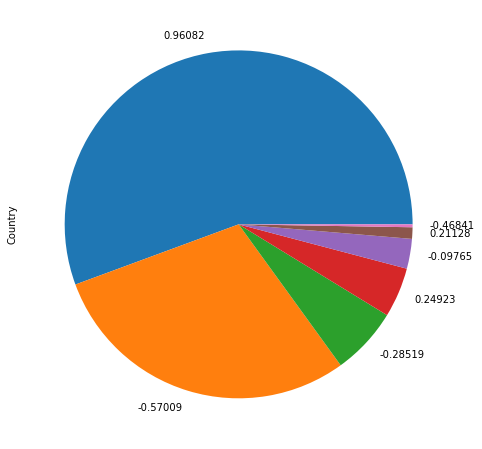

In [15]:
countries = data['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

##### As we can see, the dataset still need more cleaning.  All input attributes are originally categorical and are quantified, so for analysis purposes it was retrieved to more clear form.

In [16]:
data_str = data.copy()

In [17]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in data_str['Age']]

gender = ['Female' if g > 0 else "Male" for g in data_str['Gender']]

education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in data_str['Education']]

country = ['United States' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'United Kingdom' 
           for c in data_str['Country']]

ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in data_str['Ethnicity']]


data_str['Age'] = age
data_str['Gender'] = gender
data_str['Education'] = education
data_str['Country'] = country
data_str['Ethnicity'] = ethnicity

In [18]:
data_str.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,1,35-44,Female,Professional certificate/ diploma,United Kingdom,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,25-34,Male,Doctorate degree,United Kingdom,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,35-44,Male,Professional certificate/ diploma,United Kingdom,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters degree,United Kingdom,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,35-44,Female,Doctorate degree,United Kingdom,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


##### Way more understandable !

### Now let's check the distribution per Country, Ethnicity, Age, Gender and Education <a class="anchor" id="check_distrib"></a>

#### Per Country <a class="anchor" id="per_country"></a>

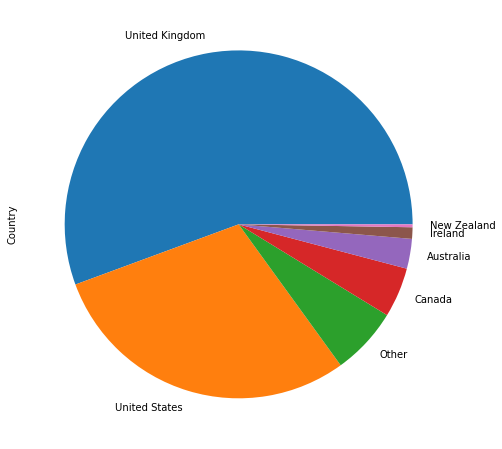

In [19]:
countries = data_str['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

##### Most of the participants come from the UK and the USA. All countries are officially English-speaking. It's non representative of the entirety of the world.

#### Per Ethnicity <a class="anchor" id="per_ethnicity"></a>

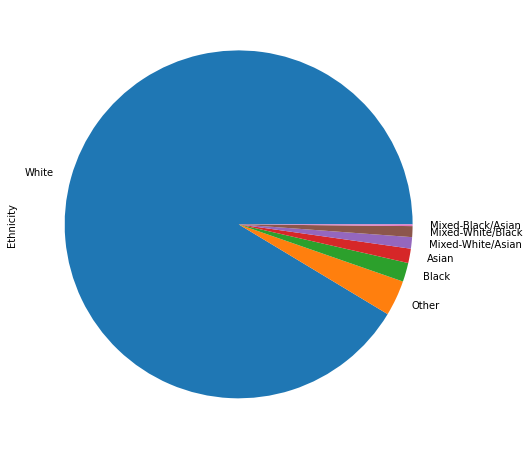

In [20]:
ethnicity = data_str['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

##### Non-surprisingly, more than 90% of the participants are white. It's an important bias to take into account.

#### Per Age <a class="anchor" id="per_age"></a>

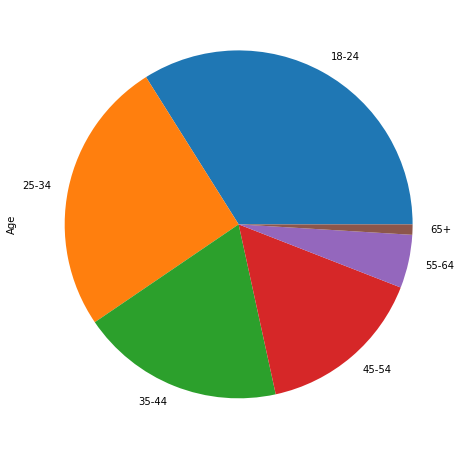

In [21]:
age = data_str['Age'].value_counts().plot(kind='pie', figsize=(8, 8))

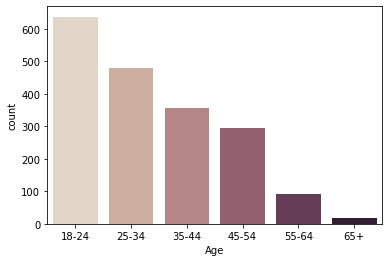

In [22]:
sns.countplot(x='Age', palette='ch:.25', data=data_str.sort_values(by=['Age']))

In [23]:
#Age (Real) is age of participant and has one of the values:
# Value Meaning Cases Fraction
# -0.95197 18-24 643 34.11%
# -0.07854 25-34 481 25.52%
# 0.49788 35-44 356 18.89%
# 1.09449 45-54 294 15.60%
# 1.82213 55-64 93 4.93%
# 2.59171 65+ 18 0.95%

# The age is given in the intervals of about 10 years.

# 18-24 is the biggest age group (about 1/3 of all participants).

# 25-34 is 1/4 of participants.

# 35-54 is another 1/3 of participants. The rest 5% are the people above 55 y.o.

#### Per Gender <a class="anchor" id="per_gender"></a>

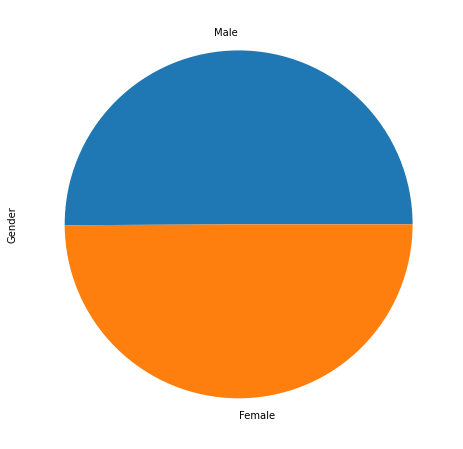

In [24]:
gender = data_str['Gender'].value_counts().plot(kind='pie', figsize=(8, 8))

##### There is nearly the same number of male and female participants.

#### Per Education <a class="anchor" id="per_gender"></a>

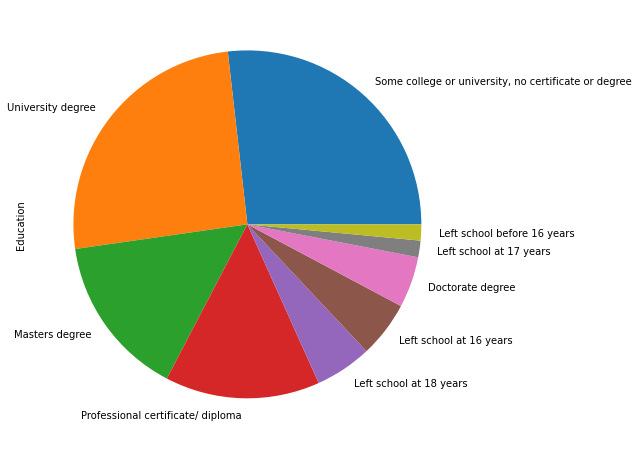

In [25]:
education = data_str['Education'].value_counts().plot(kind='pie', figsize=(8,8))

##### The big majority of the participants is well educated and has a university degree or some college experience.

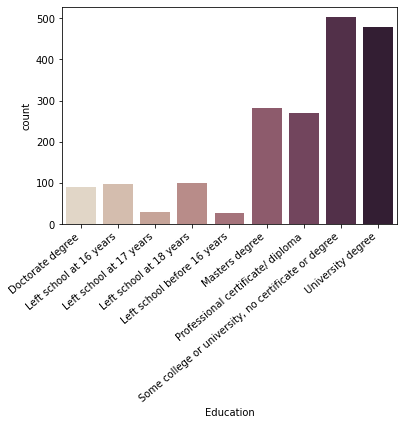

In [26]:
edu_plot = sns.countplot(x='Education', palette='ch:.25', data=data_str.sort_values(by=['Education']))
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=40, ha="right")
edu_plot

### Now let's study the distribution of the variables between themselves

#### Age – Gender distribution <a class="anchor" id="age_gender_distrib"></a>

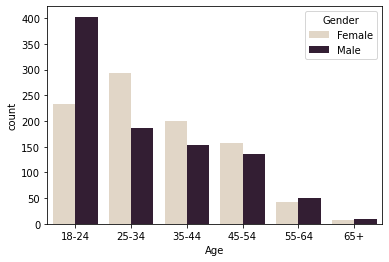

In [28]:
sns.countplot(x='Age', hue='Gender', palette='ch:.25', data=data_str.sort_values(by=['Age']))

In [29]:
# The males are predominant in the age group 18-24. 
# Then the females predominate decreasingly inf the age groups 25-34, 35-44, 45-54. 
# Finally, the males predominate very slightly for the groups higher than 55 years old.

#### Country – Gender distribution <a class="anchor" id="country_gender_distrib"></a>

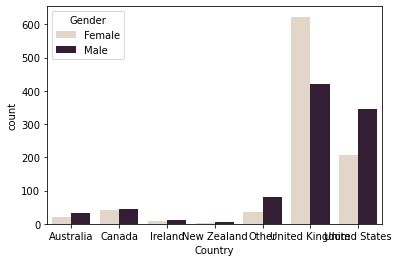

In [30]:
sns.countplot(x='Country', hue='Gender', palette='ch:.25', data=data_str.sort_values(by=['Country']))

In [31]:
# More women were tested in the UK (the ratio around 3 2) and more men were tested in the USA (ratio around 7:4).

#### Education - Gender distribution <a class="anchor" id="education_gender_distrib"></a>

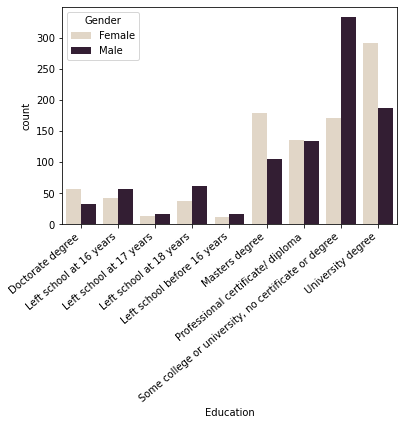

In [32]:
distr_plot = sns.countplot(x='Education', hue='Gender', palette='ch:.25', data=data_str.sort_values(by=['Education']))
distr_plot.set_xticklabels(distr_plot.get_xticklabels(), rotation=40, ha="right")
distr_plot

In [33]:
# The females group predominate in the University degrees and masters degrees,
# while the males group predominate in only some college experience.
# For the rest, the two groupes are kind of equally represented.

#### Ethnicity - Gender distribution <a class="anchor" id="ethnicity_gender_distrib"></a>

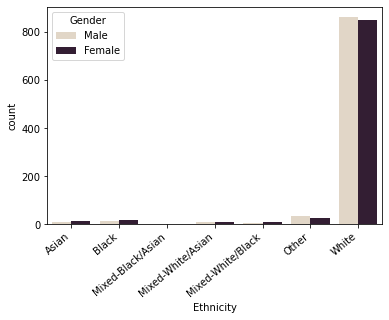

In [34]:
ethn_plot = sns.countplot(x='Ethnicity', hue='Gender', palette='ch:.25', data=data_str.sort_values(by=['Ethnicity']))
ethn_plot.set_xticklabels(ethn_plot.get_xticklabels(), rotation=40, ha="right")
ethn_plot

In [35]:
# The males and females groups are both equally represented.

### Now let's study the variables with cross-tables

#### Age – Gender – Country cross table <a class="anchor" id="age_gender_country_crosstable"></a>

In [36]:
pd.crosstab(data_str['Age'], [data_str['Gender'], data_str['Country']])

Gender     Female                                                  \
Country Australia Canada Ireland New Zealand Other United Kingdom   
Age                                                                 
18-24           1      7       3           0    12            112   
25-34          10      9       2           1    13            200   
35-44           4      8       3           0     7            150   
45-54           5      7       1           0     4            127   
55-64           0      7       0           0     0             29   
65+             0      3       0           0     0              5   

Gender                     Male                                   \
Country United States Australia Canada Ireland New Zealand Other   
Age                                                                
18-24              99        20     25       5           2    39   
25-34              58         5      8       3           2    26   
35-44              29         3      7       0           0    10   
45-54              14         3      4       3           0     5   
55-64               7         1      1       0           0     2   
65+                 0         0      1       0           0     0   

Gender                                
Country United Kingdom United States  
Age                                   
18-24               91           221  
25-34               80            63  
35-44              108            26  
45-54               99            22  
55-64               36            10  
65+                  7             2

In [37]:
# Only one male over 54 years old was tested in Australia
# No people over 54 years old were tested in Ireland
# No people vers 34 years old were tested in New Zealand
# Way more males of 18-24 years old than females were tested in the USA

#### Education – Gender – Ethnicity cross table <a class="anchor" id="education_gender_ethnicity_crosstable"></a>

In [38]:
data_str.pivot_table(index='Education', columns=['Gender', 'Ethnicity'], aggfunc='size', fill_value=0)

Gender                                             Female        \
Ethnicity                                           Asian Black   
Education                                                         
Doctorate degree                                        1     0   
Left school at 16 years                                 0     0   
Left school at 17 years                                 0     0   
Left school at 18 years                                 0     0   
Left school before 16 years                             0     0   
Masters degree                                          4     6   
Professional certificate/ diploma                       0     3   
Some college or university, no certificate or d...      3     2   
University degree                                       7     6   

Gender                                                                \
Ethnicity                                          Mixed-Black/Asian   
Education                                                              
Doctorate degree                                                   0   
Left school at 16 years                                            0   
Left school at 17 years                                            0   
Left school at 18 years                                            0   
Left school before 16 years                                        0   
Masters degree                                                     0   
Professional certificate/ diploma                                  0   
Some college or university, no certificate or d...                 1   
University degree                                                  1   

Gender                                                                \
Ethnicity                                          Mixed-White/Asian   
Education                                                              
Doctorate degree                                                   1   
Left school at 16 years                                            0   
Left school at 17 years                                            0   
Left school at 18 years                                            0   
Left school before 16 years                                        0   
Masters degree                                                     3   
Professional certificate/ diploma                                  1   
Some college or university, no certificate or d...                 2   
University degree                                                  4   

Gender                                                                      \
Ethnicity                                          Mixed-White/Black Other   
Education                                                                    
Doctorate degree                                                   2     1   
Left school at 16 years                                            0     2   
Left school at 17 years                                            1     0   
Left school at 18 years                                            0     2   
Left school before 16 years                                        0     0   
Masters degree                                                     5     5   
Professional certificate/ diploma                                  0     2   
Some college or university, no certificate or d...                 1     8   
University degree                                                  2     8   

Gender                                                    Male        \
Ethnicity                                          White Asian Black   
Education                                                              
Doctorate degree                                      52     1     0   
Left school at 16 years                               40     0     0   
Left school at 17 years                               12     0     0   
Left school at 18 years                               35     0     1   
Left school before 16 ye

#### Country – Gender – Ethnicity crosstable <a class="anchor" id="country_gender_ethnicity_crosstable"></a>

In [39]:
pd.crosstab(data_str['Country'], [data_str['Gender'], data_str['Ethnicity']])

Gender         Female                                            \
Ethnicity       Asian Black Mixed-Black/Asian Mixed-White/Asian   
Country                                                           
Australia           0     0                 0                 0   
Canada              0     0                 0                 2   
Ireland             0     0                 0                 0   
New Zealand         0     0                 0                 0   
Other               1     1                 0                 0   
United Kingdom     11    14                 0                 6   
United States       3     2                 2                 3   

Gender                                        Male                          \
Ethnicity      Mixed-White/Black Other White Asian Black Mixed-Black/Asian   
Country                                                                      
Australia                      0     0    20     0     0                 0   
Canada                         0     1    38     0     0                 0   
Ireland                        0     0     9     0     0                 0   
New Zealand                    0     0     1     0     0                 0   
Other                          2     2    30     1     0                 1   
United Kingdom                 9    12   571     9    11                 0   
United States                  0    13   184     0     5                 0   

Gender                                                          
Ethnicity      Mixed-White/Asian Mixed-White/Black Other White  
Country                                                         
Australia                      0                 0     0    32  
Canada                         0                 2     2    42  
Ireland                        0                 0     0    11  
New Zealand                    0                 0     0     4  
Other                          0                 1     5    74  
United Kingdom                 2                 1     4   394  
United States                  7                 4    23   305

## The seven classes / Drug consumption overview <a class="anchor" id="seven_classes_drug_overview"></a>

#### As explained on the dataset attribute information:

0 - Never Used

1 - Used over a Decade Ago

2 - Used in Last Decade

3 - Used in Last Year

4 - Used in Last Month

5 - Used in Last Week

6 - Used in Last Day

In [40]:
drugs = data_str[drugs_columns]

### Overview of all the drugs <a class="anchor" id="drugs_overview"></a>

In [41]:
drugs.head()

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0


In [42]:
d1 = drugs['Alcohol consumption'].value_counts()
d2 = drugs['Amphetamines consumption'].value_counts()
d3 = drugs['Amyl nitrite consumption'].value_counts()
d4 = drugs['Benzodiazepine consumption'].value_counts()
d5 = drugs['Caffeine consumption'].value_counts()
d6 = drugs['Cannabis consumption'].value_counts()
d7 = drugs['Chocolate consumption'].value_counts()
d8 = drugs['Cocaine consumption'].value_counts()
d9 = drugs['Crack consumption'].value_counts()
d10 = drugs['Ecstasy consumption'].value_counts()
d11 = drugs['Heroin consumption'].value_counts()
d12 = drugs['Ketamine consumption'].value_counts()
d13 = drugs['Legal highs consumption'].value_counts()
d14 = drugs['Lysergic acid diethylamide consumption'].value_counts()
d15 = drugs['Methadone consumption'].value_counts()
d16 = drugs['Magic mushrooms consumption'].value_counts()
d17 = drugs['Nicotine consumption'].value_counts()
d18 = drugs['Volatile substance abuse consumption'].value_counts()

drugs = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18], axis=1, 
          keys=['Alcohol', 'Amphetamines', 'Amyl nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 
                'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs', 'LSD', 
                'Methadone', 'Magic mushrooms', 'Nicotine', 'VSA'], sort=True)
drugs.T.fillna(0).astype(np.int64)

,0,1,2,3,4,5,6
Alcohol,33,34,68,197,284,758,503
Amphetamines,973,230,241,196,75,61,101
Amyl nitrite,1299,210,236,91,24,14,3
Benzodiazepine,999,116,230,234,119,84,95
Caffeine,27,10,24,59,106,271,1380
Cannabis,413,207,266,210,138,185,458
Chocolate,32,2,10,53,295,680,805
Cocaine,1036,160,267,257,98,40,19
Crack,1622,67,109,59,9,9,2
Ecstasy,1020,112,232,275,154,63,21


Alcohol, Caffeine, Chocolate and Nicotine are stimulants that are consumed rather often and hardly anyone has ever tried them.

Cannabis distributes moreless evenly. There is nearly the same number of people that took it lately as the number of people that never tried it. Intuitions: this reflects the society attitude to cannabis as a drug between "bad" narcotic and "ordinary" drug.

Amphetamine, Amyl nitrite, Benzodiazepine, Cocaine, Ecstasy, Heroin, Ketamine, Legal highs, LSD, Methadone, Magic mushrooms, Volatile substance abuse - the vast majority of people never tried it, or did it long time ago rather than recently (up to a month ago). Intuitions: people either do not take it at all (e.g. because they are afraid of it / do not want to), or they will try it once and then do not go back to it.

### Personality measurements <a class="anchor" id="personality_measurements"></a>

In [43]:
pers_data = data[personality_columns]
pers_data.describe()

,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


 Personality measurements include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsiveness) and ImpSS (sensation seeking).

Neuroticism: levels 12 - 60

Extraversion: levels 16 - 59

Openess to experience: levels 24 - 60

Agreeableness: levels 12 - 60

Conscientiousness: levels 17 - 59

In [44]:
corr = pers_data.corr(method="spearman")
corr

,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking
Neuroticism,1.000000,-0.416843,0.015156,-0.205869,-0.377803,0.168010,0.090256
Extraversion,-0.416843,1.000000,0.226260,0.161784,0.290479,0.119210,0.189641
Openness to experience,0.015156,0.226260,1.000000,0.036995,-0.073167,0.270398,0.404787
Agreeableness,-0.205869,0.161784,0.036995,1.000000,0.236550,-0.225828,-0.208106
Conscientiousness,-0.377803,0.290479,-0.073167,0.236550,1.000000,-0.344500,-0.254003
Impulsiveness,0.168010,0.119210,0.270398,-0.225828,-0.344500,1.000000,0.628217
Sensation seeking,0.090256,0.189641,0.404787,-0.208106,-0.254003,0.628217,1.000000


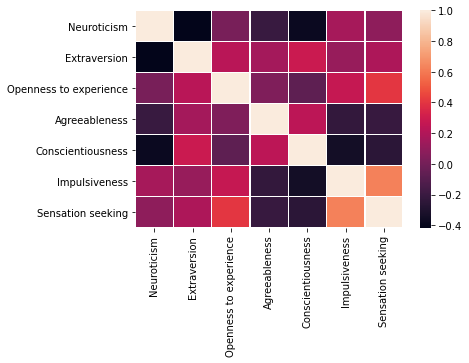

In [45]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5)

There is no correlation between Openness to experience and Neuroticism.

The remaining correlations are at most moderate correlations.

There are no strong correlations between personality factors.        The strongest correlations (significant, positive):

Sensation seeking and Impulsiveness (r = 0.63)
Sensation seeking and Openness to experience (r = 0.4)
The strongest correlations (significant, negative):

Extraversion and Neuroticism (r = -0.42)
Neuroticism and Conscientiousness (r = -0.38)
Conscientiousness and Impulsiveness (r = -0.34)

### Now let's try to see if there is a correlation between the heroin consumption and the personality measurements of a participant <a class="anchor" id="correl_heroin_personality"></a>

#### Correlation with Neuroticism <a class="anchor" id="with_neuroticism"></a>

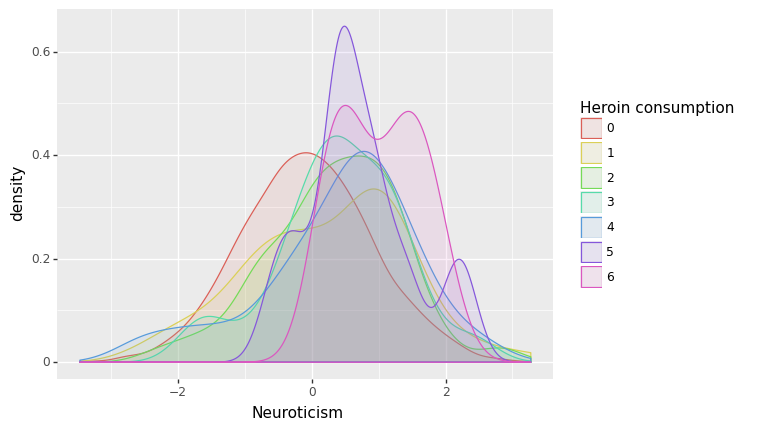

<ggplot: (171267564727)>

In [46]:
data_str = data_str.astype({"Heroin consumption":"category"})
ggplot(data_str ,aes(x='Neuroticism',color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1) 

#### Correlation with Extraversion <a class="anchor" id="with_extraversion"></a>

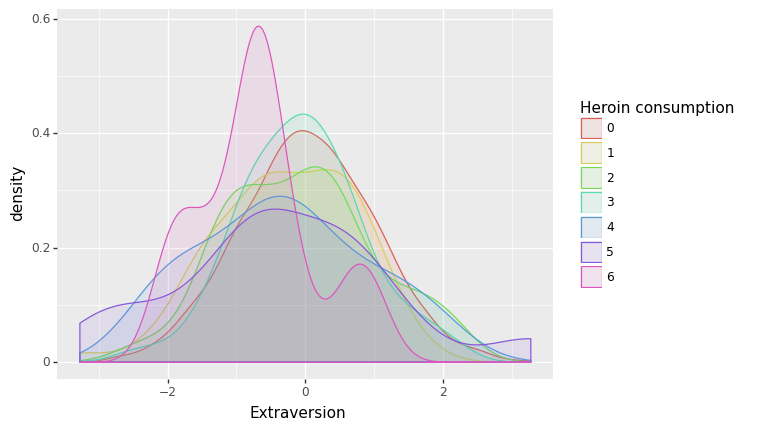

<ggplot: (171269133793)>

In [47]:
ggplot(data_str, aes("Extraversion",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

#### Correlation with Openness to experience <a class="anchor" id="with_openness"></a>

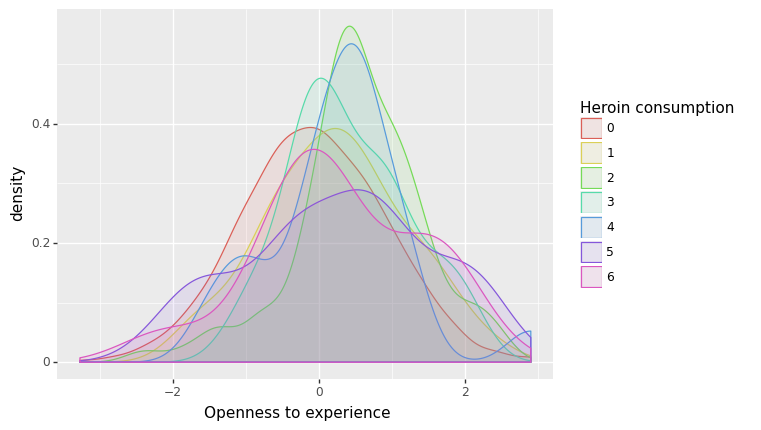

<ggplot: (171269274337)>

In [48]:
ggplot(data_str, aes("Openness to experience",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

#### Correlation with Agreeableness <a class="anchor" id="with_agreeableness"></a>

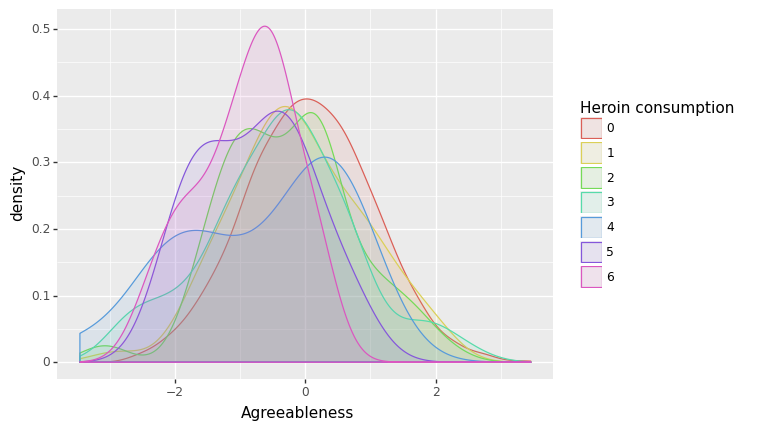

<ggplot: (171269492828)>

In [49]:
ggplot(data_str, aes("Agreeableness",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

#### Correlation with Conscientiousness <a class="anchor" id="with_conscientiousness"></a>

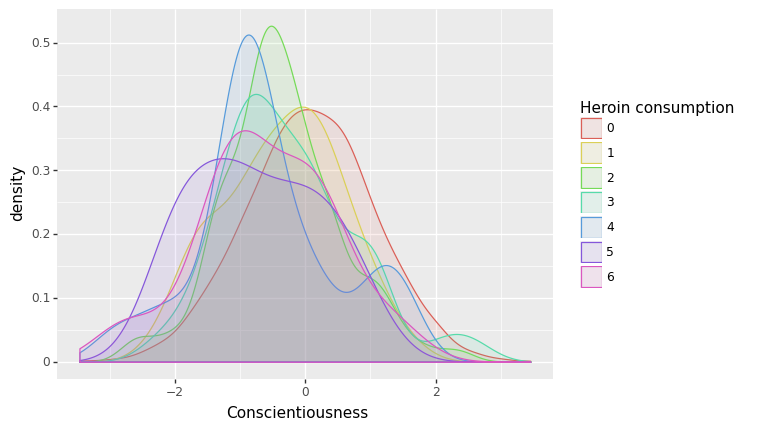

<ggplot: (171269722793)>

In [50]:
ggplot(data_str, aes("Conscientiousness",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

#### Correlation with Impulsiveness <a class="anchor" id="with_impulsiveness"></a>

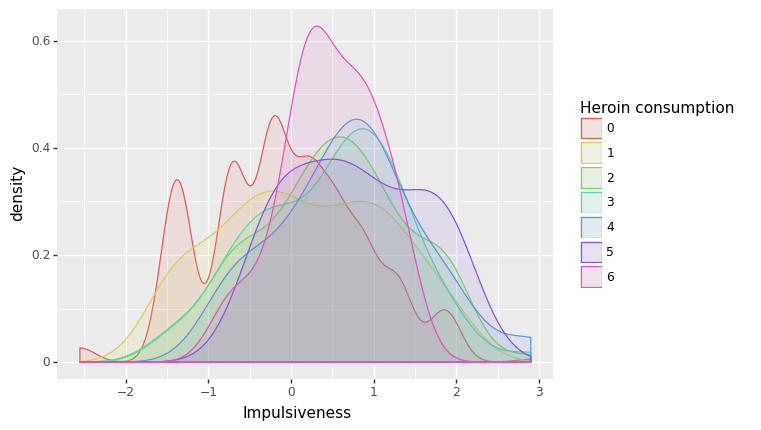

<ggplot: (-9223371865584849583)>

In [51]:
ggplot(data_str, aes("Impulsiveness",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

#### Correlation with Sensation seeking <a class="anchor" id="with_sensation_seeking"></a>

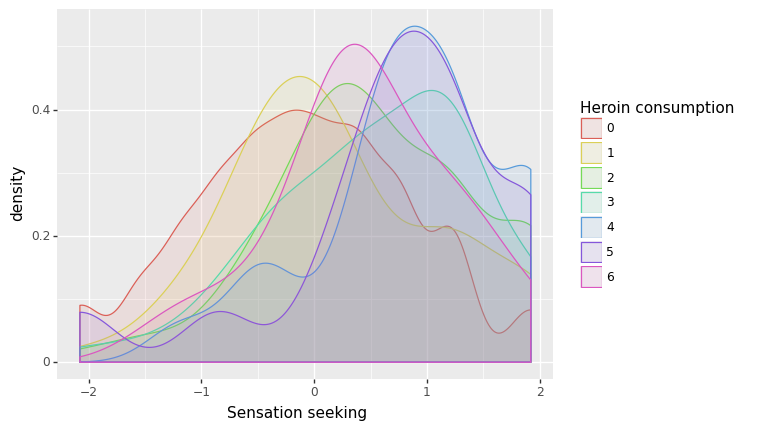

<ggplot: (-9223371865586826580)>

In [52]:
ggplot(data_str, aes("Sensation seeking",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

As we can see, the people consumming heroin tend to have more neuroses, more to open to new experiences,more impulsives and tend to search for more sensations; while they are less extraverts,agreeables,or conscientious.

# Problem resolution <a class="anchor" id="problem_resolution"></a>

## The seven classes <a class="anchor" id="seven_classes"></a>

As given in the dataset, we have the seven following classes : 

0 - Never Used

1 - Used over a Decade Ago

2 - Used in Last Decade

3 - Used in Last Year

4 - Used in Last Month

5 - Used in Last Week

6 - Used in Last Day

## Binary classification by union of part of classes into one new class <a class="anchor" id="binary_classification"></a>

###  "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User" <a class="anchor" id="non_user_user"></a>

In [53]:
for i in drugs_columns:
    data_str[i] = data_str[i].map({ 0 : 0,  1 : 0, 2 : 1, 3 : 1, 4 : 1, 5 : 1, 6 : 1})

In [54]:
data_str.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,1,35-44,Female,Professional certificate/ diploma,United Kingdom,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,25-34,Male,Doctorate degree,United Kingdom,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,35-44,Male,Professional certificate/ diploma,United Kingdom,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,18-24,Female,Masters degree,United Kingdom,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,35-44,Female,Doctorate degree,United Kingdom,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,1,1,0,0


Now let's see if it has a real impact on the graphs we made higher

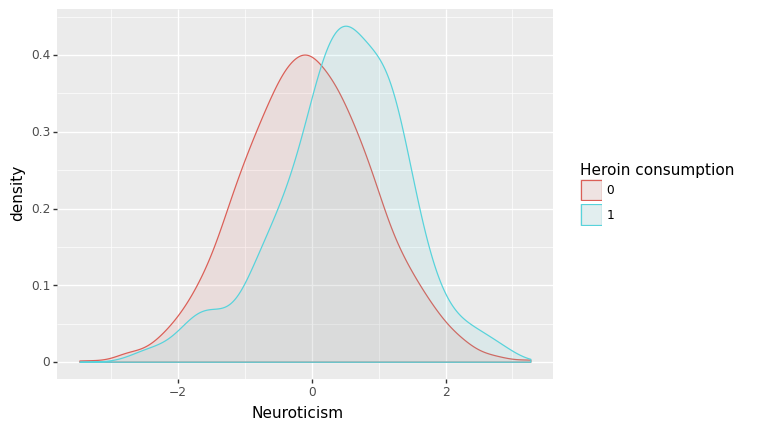

<ggplot: (-9223371865586752936)>

In [172]:
data_str = data_str.astype({"Heroin consumption":"category"})
ggplot(data_str ,aes(x='Neuroticism',color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1) 

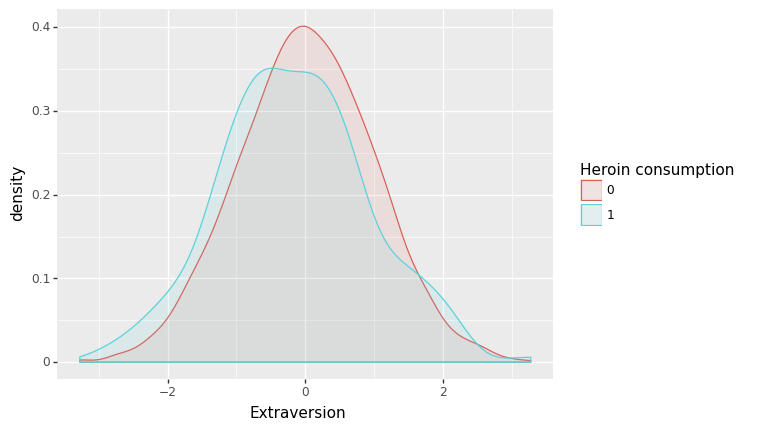

<ggplot: (171269971369)>

In [173]:
ggplot(data_str, aes("Extraversion",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

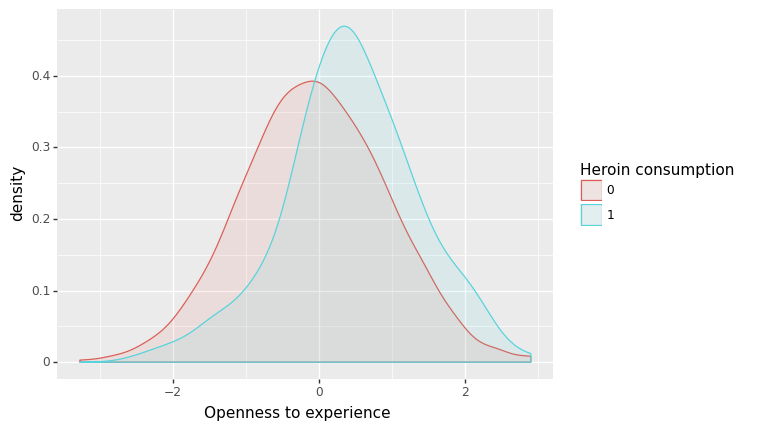

<ggplot: (171269095018)>

In [174]:
ggplot(data_str, aes("Openness to experience",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

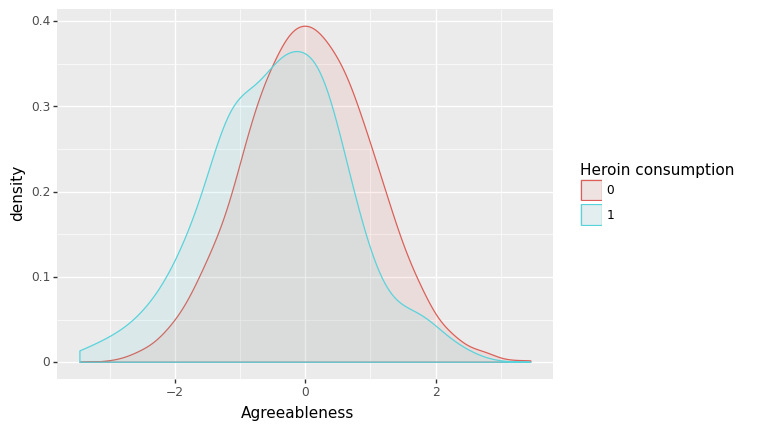

<ggplot: (-9223371865585021643)>

In [175]:
ggplot(data_str, aes("Agreeableness",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

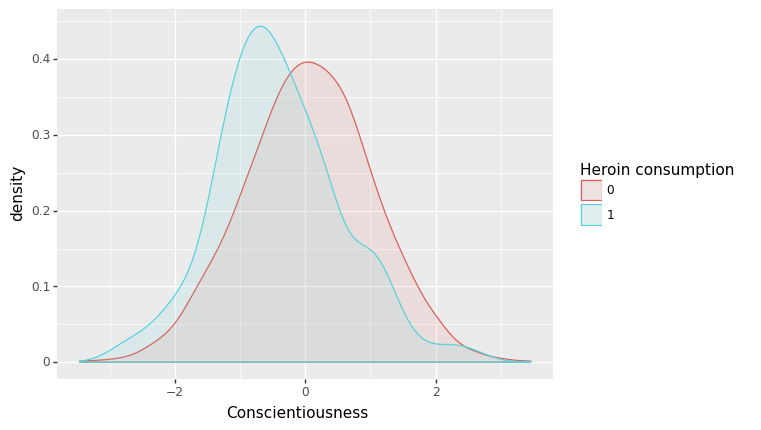

<ggplot: (171269811688)>

In [176]:
ggplot(data_str, aes("Conscientiousness",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

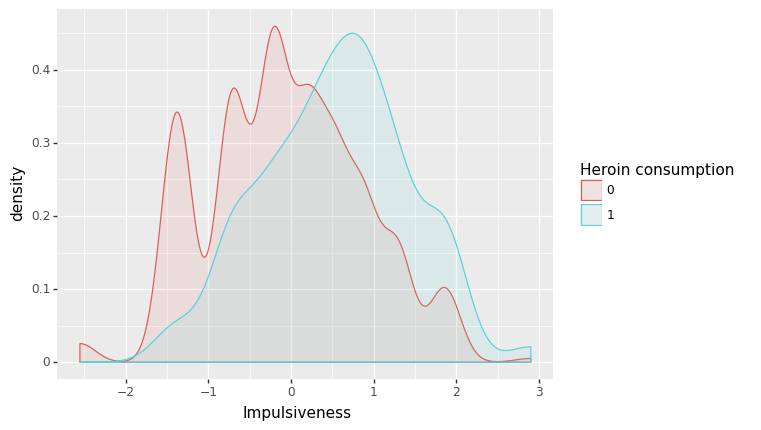

<ggplot: (171273484615)>

In [177]:
ggplot(data_str, aes("Impulsiveness",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

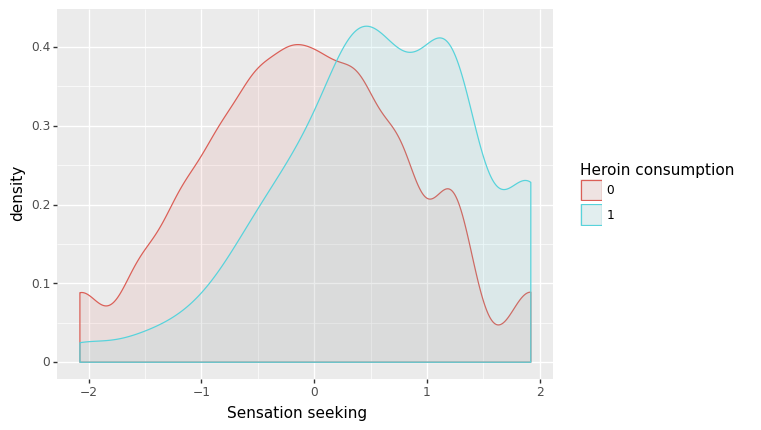

<ggplot: (171273542397)>

In [178]:
ggplot(data_str, aes("Sensation seeking",color = "Heroin consumption", fill = "Heroin consumption"))+ geom_density(alpha=0.1)

As we can see, the results we obtain are the same.

### P-values : correlation between drugs consumption and personality traits <a class="anchor" id="p_values"></a>

In [62]:
def calculate_r(df1, df2, method='spearman', p=0.05, pvalues=True):
    
    data_corr_table = pd.DataFrame()
    data_pvalues = pd.DataFrame()
    for x in df1.columns:
        for y in df2.columns:
            if method == 'pearson':
                corr = pearsonr(df1[x], df2[y])
            elif method == 'spearman':
                corr = spearmanr(df1[x], df2[y])
            else:
                raise ValueError('Unknown method')
            if pvalues:
                data_corr_table.loc[x,y] = '{} {}'.format(round(corr[0], 3), '**' if round(corr[1], 3) < p else '')
            elif not pvalues:
                data_corr_table.loc[x,y] = round(corr[0], 3)
            data_pvalues.loc[x,y] = round(corr[1], 3)
    
    return data_corr_table, data_pvalues

In [63]:
drug_data = data[drugs_columns]
drug_pers_corr_table, drug_pers_pvalues = calculate_r(drug_data, pers_data, method='spearman')
drug_pers_corr_table

,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking
Alcohol consumption,0.0,0.084 **,0.032,-0.033,0.006,0.039,0.094 **
Amphetamines consumption,0.135 **,-0.042,0.253 **,-0.14 **,-0.253 **,0.294 **,0.365 **
Amyl nitrite consumption,0.04,0.04,0.065 **,-0.079 **,-0.121 **,0.13 **,0.189 **
Benzodiazepine consumption,0.266 **,-0.096 **,0.225 **,-0.164 **,-0.217 **,0.233 **,0.255 **
Caffeine consumption,0.022,0.013,-0.02,-0.008,0.006,0.014,-0.005
Cannabis consumption,0.11 **,-0.022,0.417 **,-0.155 **,-0.293 **,0.313 **,0.465 **
Chocolate consumption,0.025,0.028,-0.015,0.038,0.023,-0.015,-0.052 **
Cocaine consumption,0.144 **,0.006,0.205 **,-0.183 **,-0.221 **,0.264 **,0.34 **
Crack consumption,0.118 **,-0.052 **,0.126 **,-0.091 **,-0.13 **,0.19 **,0.197 **
Ecstasy consumption,0.087 **,0.056 **,0.311 **,-0.118 **,-0.249 **,0.272 **,0.405 **


Alcohol, Caffeine and Chocolate correlate very poorly or not at all with personality factors. The frequency of their use does not seem to depend on personality.

Extraversion correlates very poorly or not at all with the use of any stimulants.

Conscientiousness correlates weakly or not at all with all stimulants (r > -0.3), the strongest correlation is with Cannabis, Legal hihgs, Amphetamine, Ecstasy, Nicotine.

The rest of correlations are at most moderate correlations. There are no strong correlations between personality factors and the use of stimulants.        The strongest correlations (significant, positive, because there are no such negative):

Sensation seeking and Cannabis (r = 0.47)
Sensation seeking and Legal hihgs (r = 0.44)
Openness to experience and Cannabis (r = 0.42)
Sensation seeking and Ecstasy (r = 0.41)
Sensation seeking and Magic mushrooms (r = 0.39)
Sensation seeking and LSD (r = 0.38)
Openness to experience and Magic mushrooms (r = 0.38)
Openness to experience and LSD (r = 0.37)
Sensation seeking and Amphetamine (r = 0.36)
Openness to experience and Legal hihgs (r = 0.35)

### Association rules  <a class="anchor" id="association_rules"></a>

In [64]:
corr2 = drug_data.corr("spearman")
corr2

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
Alcohol consumption,1.000000,-0.019166,0.075795,-0.029664,0.102630,0.003141,0.009728,0.054331,-0.056254,0.039479,-0.053752,0.047871,0.009589,-0.016689,-0.080070,-0.000161,0.043000,-0.002056
Amphetamines consumption,-0.019166,1.000000,0.365307,0.504613,0.021862,0.504292,-0.092751,0.606222,0.337964,0.579075,0.381906,0.402247,0.481492,0.498525,0.421739,0.483528,0.394919,0.326920
Amyl nitrite consumption,0.075795,0.365307,1.000000,0.218592,0.060520,0.217195,0.004927,0.394654,0.177640,0.358781,0.168753,0.343686,0.215807,0.208428,0.078076,0.236220,0.228070,0.188340
Benzodiazepine consumption,-0.029664,0.504613,0.218592,1.000000,0.051582,0.369556,-0.052922,0.466595,0.372113,0.373188,0.436654,0.314000,0.344866,0.369556,0.515132,0.374151,0.317524,0.313809
Caffeine consumption,0.102630,0.021862,0.060520,0.051582,1.000000,-0.010388,0.109412,0.035944,0.010861,-0.037453,0.006018,-0.033067,-0.052239,-0.038172,0.013841,-0.004313,0.101084,0.029529
Cannabis consumption,0.003141,0.504292,0.217195,0.369556,-0.010388,1.000000,-0.107894,0.476703,0.240102,0.565649,0.238642,0.319304,0.577677,0.541520,0.322256,0.592796,0.515086,0.289878
Chocolate consumption,0.009728,-0.092751,0.004927,-0.052922,0.109412,-0.107894,1.000000,-0.088453,-0.126373,-0.091378,-0.083463,-0.053257,-0.098006,-0.121547,-0.060949,-0.107842,-0.058421,-0.092204
Cocaine consumption,0.054331,0.606222,0.394654,0.466595,0.035944,0.476703,-0.088453,1.000000,0.405806,0.631031,0.428010,0.464774,0.420413,0.464422,0.377906,0.468775,0.413954,0.322297
Crack consumption,-0.056254,0.337964,0.177640,0.372113,0.010861,0.240102,-0.126373,0.405806,1.000000,0.259881,0.539062,0.269174,0.199179,0.307887,0.391307,0.292676,0.255785,0.304889
Ecstasy consumption,0.039479,0.579075,0.358781,0.373188,-0.037453,0.565649,-0.091378,0.631031,0.259881,1.000000,0.289538,0.522945,0.570100,0.581237,0.313170,0.565198,0.392411,0.281744


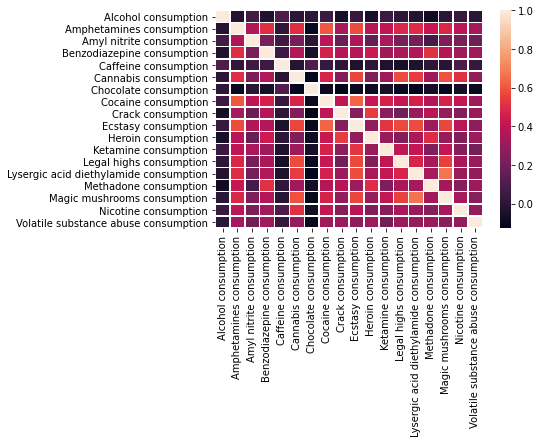

In [65]:
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns,linewidths=.5)

# Modelling <a class="anchor" id="modelling"></a>

In [66]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
df

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,35-44,Female,Professional certificate/ diploma,United Kingdom,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,25-34,Male,Doctorate degree,United Kingdom,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,35-44,Male,Professional certificate/ diploma,United Kingdom,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,18-24,Female,Masters degree,United Kingdom,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,35-44,Female,Doctorate degree,United Kingdom,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,Female,"Some college or university, no certificate or ...",United States,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,1,1,0,0,0,0,1
1881,18-24,Male,"Some college or university, no certificate or ...",United States,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,1,0,0,1,1,1,1,1,0,0
1882,25-34,Female,University degree,United States,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,1,0,1,0,1,1,0,0
1883,18-24,Female,"Some college or university, no certificate or ...",United States,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,1,0,0,1,1,0,1,1,0,0


### First, let's make a model for Alcohol consumption <a class="anchor" id="alcohol_consumption"></a>

In [67]:
X, y = df.drop("Alcohol consumption", axis=1), df["Alcohol consumption"]

#### encoding the categorical features <a class="anchor" id="encoding_categorical_features"></a>

In [68]:
X.dtypes

Age                                        object
Gender                                     object
Education                                  object
Country                                    object
Ethnicity                                  object
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeking                         float64
Amphetamines consumption                    int64
Amyl nitrite consumption                    int64
Benzodiazepine consumption                  int64
Caffeine consumption                        int64
Cannabis consumption                        int64
Chocolate consumption                       int64
Cocaine consumption                         int64
Crack consumption                           int64


In [69]:
encoder = OneHotEncoder(drop="first", sparse=False)

X[encoder.get_feature_names(["has", "is", "studied", "isfrom", "hasethnicity"])] =\
    encoder.fit_transform(X[["Age" , "Gender" , "Education", "Country", "Ethnicity"]])
X.drop(["Age" , "Gender" , "Education", "Country", "Ethnicity"], axis=1, inplace=True)
X.head()

,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,...,isfrom_New Zealand,isfrom_Other,isfrom_United Kingdom,isfrom_United States,hasethnicity_Black,hasethnicity_Mixed-Black/Asian,hasethnicity_Mixed-White/Asian,hasethnicity_Mixed-White/Black,hasethnicity_Other,hasethnicity_White
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Applying some models

### <span style='color:red'> Disclaimer : Since each time i reload the code i obtain different accuracy (due to the random split of the train set and the test set), the accuracy in commentary may not match the accuracy printed by the code. </span>

#### Logistic regression <a class="anchor" id="alcohol_logistic_reg"></a>

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Let's check our first metric : the accuracy of the model <a class="anchor" id="data_visualization"></a>

In [82]:
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
acc_lr

0.9627659574468085

We obtain an accuracy of 95,2%, which is suprisingly very good for a first try.

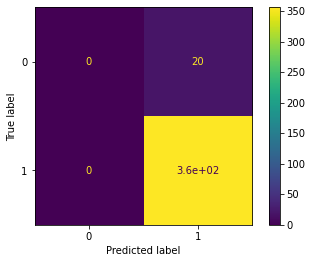

In [73]:
plot_confusion_matrix(logreg, X=X_test, y_true=y_test) # accept an already fitted model

#### Neural network model <a class="anchor" id="alcohol_neural_network"></a>

In [88]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [89]:
acc_nnm = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
acc_nnm

0.9521276595744681

We obtain an accuracy of 94,9%, which is very good but slightly less than the logistic regression model.

In [104]:
nnm_rev = make_pipeline(StandardScaler(), MLPClassifier())
nnm_rev.fit(X_train,y_train)
acc_rev = accuracy_score(y_true=y_test, y_pred=nnm_rev.predict(X_test))
acc_rev

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.9680851063829787

After making a pipeline, we obtain an accuracy of 97,1% !

In [94]:
nnm_rev = make_pipeline(StandardScaler(), MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
nnm_rev.fit(X_train,y_train)
acc_rev = accuracy_score(y_true=y_test, y_pred=nnm_rev.predict(X_test))
acc_rev

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.9813829787234043

Here is the best model i could find, with the adam solver, and an accuracy of 98.1% !

#### Stochastic Gradient descent <a class="anchor" id="alcohol_stochastic"></a>

In [110]:
cls = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
cls.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [111]:
acc_sgd = accuracy_score(y_true=y_test, y_pred=cls.predict(X_test))
acc_sgd

0.9654255319148937

Here, after some tries, i achieved an accuracy of 96.5%. Each time i load the two last cells, i obtain an accuracy between 90 and 96.5% . That's the best we achieved until now before any scaling.

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data
acc_sgd = accuracy_score(y_true=y_test, y_pred=cls.predict(X_test))
acc_sgd

0.31382978723404253

I tried to scale the data, but the results were the opposite of what i was expecting, since the accuracy dropped to 30-50%. Finally, i made a pipeline.

In [126]:
est = make_pipeline(StandardScaler(), SGDClassifier())
est.fit(X_train,y_train)
acc_pip = accuracy_score(y_true=y_test, y_pred=est.predict(X_test))
acc_pip

0.9627659574468085

The accuracy is between 96 and 97%, so the model is more robust than before.

#### The K Nearest Neighbors (K-NN)  <a class="anchor" id="alcohol_knn"></a>

In [134]:
clk = NearestCentroid()
clk.fit(X_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [135]:
acc_knn = accuracy_score(y_true=y_test, y_pred=clk.predict(X_test))
acc_knn

0.6223404255319149

We obtain an accuracy of.. 66,7%, which is the worst accuracy we had until now.  Let's try the Neighborhood Components Analysis.

In [136]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [137]:
acc_nca = accuracy_score(y_true=y_test, y_pred=nca_pipe.predict(X_test))
acc_nca

0.9680851063829787

Finally we obtain an accuracy of 96,8%  which is way better than before !

#### Decision trees <a class="anchor" id="alcohol_decision_trees"></a>

In [138]:
esti = tree.DecisionTreeClassifier()
esti.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [139]:
acc_tree = accuracy_score(y_true=y_test, y_pred=esti.predict(X_test))
acc_tree

0.949468085106383

We obtain a very nice accuracy of 94,1%

In [140]:
esti2 = tree.DecisionTreeClassifier(max_depth =2)
esti2.fit(X_train, y_train)
acc_tree2 = accuracy_score(y_true=y_test, y_pred=esti2.predict(X_test))
acc_tree2

0.9680851063829787

After multiple tries, the accuracy is the best when k=2, 97,6% ! That's the second best we got until now ! 
The paramet mean_samples_leaf does not affect our final result in our case, and scaling or making a pipeline doen't change anything either.

#### Tuning better with GridSearchCV <a class="anchor" id="gridsearch"></a>

In [141]:
param_grid={
    "max_depth" : np.arange(1, 10, 1),
    "min_samples_split": np.arange(2, 20, 3),
}
grid = GridSearchCV(
    estimator=tree.DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=KFold(5, shuffle=True)
)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [143]:
esti3 = tree.DecisionTreeClassifier(ccp_alpha=0.0, max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
esti3.fit(X_train, y_train)
acc_tree3 = accuracy_score(y_true=y_test, y_pred=esti2.predict(X_test))
acc_tree3

0.9680851063829787

We obtain similar results, and the accuracy is the same with thoses parameters.

Text(0.5, 1.0, 'MSE on test with diff hyperparameters values')

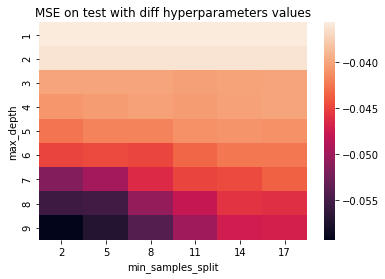

In [144]:
df_grid = pd.DataFrame(grid.cv_results_)
params = df_grid.params.apply(pd.Series)
df_grid = pd.concat([params, df_grid], axis=1)
pivot = df_grid.pivot_table(index='max_depth', columns='min_samples_split', values="mean_test_score")
ax = sns.heatmap(pivot)
ax.set_title("MSE on test with diff hyperparameters values")

### Checking of the results <a class="anchor" id="check_results"></a>

In [148]:
alcohol = [acc_lr,acc_rev,acc_pip,acc_nca,acc_tree2]

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
p = figure(x_range=models, plot_width=800, plot_height=400, title="Models' results")
p.vbar(x=models,width=0.5, bottom=0.95,
       top=[acc_lr, acc_rev, acc_pip, acc_nca, acc_tree2], color=Spectral5)

show(p)
output_notebook()

Loading BokehJS ...

Okay so that's the results we got with the alcohol drug. Now we still have all the other drugs to study.

In [200]:
def func(X,y):

    encoder = OneHotEncoder(drop="first", sparse=False)
    X[encoder.get_feature_names(["has", "is", "studied", "isfrom", "hasethnicity"])] =\
        encoder.fit_transform(X[["Age" , "Gender" , "Education", "Country", "Ethnicity"]])
    X.drop(["Age" , "Gender" , "Education", "Country", "Ethnicity"], axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #first model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))

    #second model
    nnm_rev = make_pipeline(StandardScaler(), MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
    nnm_rev.fit(X_train,y_train)
    acc_rev = accuracy_score(y_true=y_test, y_pred=nnm_rev.predict(X_test))

    #third model
    est = make_pipeline(StandardScaler(), SGDClassifier(max_iter=100))
    est.fit(X_train,y_train)
    acc_pip = accuracy_score(y_true=y_test, y_pred=est.predict(X_test))

    #fourth model
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)
    nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
    nca_pipe.fit(X_train, y_train)
    acc_nca = accuracy_score(y_true=y_test, y_pred=nca_pipe.predict(X_test))

    #fifth model
    esti2 = tree.DecisionTreeClassifier(max_depth =2)
    esti2.fit(X_train, y_train)
    acc_tree2 = accuracy_score(y_true=y_test, y_pred=esti2.predict(X_test))

    liste = [acc_lr,acc_rev,acc_pip,acc_nca,acc_tree2]
    if(max(liste)==acc_lr):
        best_model = logreg
    elif(max(liste)==acc_rev):
        best_model = nnm_rev
    elif(max(liste)==acc_pip):
        best_model = est
    elif(max(liste)==acc_nca):
        best_model = nca_pipe
    else:
        best_model = esti2
        
    return liste, best_model

In [342]:
best_models_per_drug = []
best_models_per_drug.append([nnm_rev,"Alcohol consumption"])

## Amphetamines consumption <a class="anchor" id="amphetamines_consumption"></a>

In [343]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Amphetamines consumption", axis=1), df["Amphetamines consumption"]


amphetamines, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines}
colors = ["#c9d9d3", "#718dbf"]

p = figure(x_range=models, plot_width=800, plot_height=400, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()


C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [204]:
print(max(amphetamines))

0.8377659574468085


In [344]:
best_models_per_drug.append([best_model,"Amphetamines consumption"])

## Amyl nitrite consumption <a class="anchor" id="amyl_nitrite_consumption"></a>

In [345]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Amyl nitrite consumption", axis=1), df["Amyl nitrite consumption"]

amyl, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl nitrite"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl nitrite' : amyl}
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

p = figure(x_range=models, plot_width=800, plot_height=400, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()


C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [207]:
print(max(amyl))

0.8670212765957447


In [346]:
best_models_per_drug.append([best_model,"Amyl nitrite consumption"])

## Benzodiazepine consumption <a class="anchor" id="benzodiazepine_consumption"></a>

In [347]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Benzodiazepine consumption", axis=1), df["Benzodiazepine consumption"]

benzo, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl nitrite", "Benzodiazepine"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl nitrite' : amyl,
        'Benzodiazepine': benzo}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3"]

p = figure(x_range=models, plot_width=800, plot_height=400, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [210]:
print(max(benzo))

0.776595744680851


In [348]:
best_models_per_drug.append([best_model,"Benzodiazepine consumption"])

## Caffeine consumption <a class="anchor" id="caffeine_consumption"></a>

In [349]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Caffeine consumption", axis=1), df["Caffeine consumption"]

caff, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [213]:
print(max(caff))

0.9813829787234043


In [350]:
best_models_per_drug.append([best_model,"Caffeine consumption"])

## Cannabis consumption <a class="anchor" id="cannabis_consumption"></a>

In [351]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Cannabis consumption", axis=1), df["Cannabis consumption"]

canna, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [216]:
print(max(canna))

0.875


In [352]:
best_models_per_drug.append([best_model,"Cannabis consumption"])

## Chocolate consumption <a class="anchor" id="chocolate_consumption"></a>

In [353]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Chocolate consumption", axis=1), df["Chocolate consumption"]

choco, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [242]:
print(max(choco))

0.9893617021276596


In [243]:
best_models_per_drug.append([best_model,"Chocolate consumption"])

## Cocaine consumption <a class="anchor" id="cocaine_consumption"></a>

In [247]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Cocaine consumption", axis=1), df["Cocaine consumption"]

cocaine, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [248]:
print(max(cocaine))

0.8776595744680851


In [354]:
best_models_per_drug.append([best_model,"Cocaine consumption"])

## Crack consumption <a class="anchor" id="crack_consumption"></a>

In [355]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Crack consumption", axis=1), df["Crack consumption"]

crack, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack"]
data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [251]:
print(max(crack))

0.9122340425531915


In [356]:
best_models_per_drug.append([best_model,"Crack consumption"])

## Ecstasy consumption <a class="anchor" id="ecstasy_consumption"></a>

In [357]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Ecstasy consumption", axis=1), df["Ecstasy consumption"]

ecstasy, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [256]:
print(max(ecstasy))

0.8829787234042553


In [358]:
best_models_per_drug.append([best_model,"Ecstasy consumption"])

## Heroin consumption <a class="anchor" id="heroin_consumption"></a>

In [359]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Heroin consumption", axis=1), df["Heroin consumption"]

heroin, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF"]

p = figure(x_range=models, plot_width=800, plot_height=600, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [258]:
print(max(heroin))

0.925531914893617


In [360]:
best_models_per_drug.append([best_model,"Heroin consumption"])

## Ketamine consumption <a class="anchor" id="ketamine_consumption"></a>

In [361]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Ketamine consumption", axis=1), df["Ketamine consumption"]

ketamine, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF"]

p = figure(x_range=models, plot_width=800, plot_height=700, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
C:\Users\anais\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


Loading BokehJS ...

In [261]:
print(max(ketamine))

0.8723404255319149


In [362]:
best_models_per_drug.append([best_model,"Ketamine consumption"])

## Legal highs consumption <a class="anchor" id="legal_highs_consumption"></a>

In [363]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Legal highs consumption", axis=1), df["Legal highs consumption"]

legal , best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine" , "Legal highs"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine,
        'Legal highs' : legal}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF", "#6533FF"]

p = figure(x_range=models, plot_width=900, plot_height=700, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [264]:
print(max(legal))

0.8457446808510638


In [364]:
best_models_per_drug.append([best_model,"Legal highs consumption"])

## Lysergic acid diethylamide consumption <a class="anchor" id="lysergic_acid_diethylamide_consumption"></a>

In [365]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Lysergic acid diethylamide consumption", axis=1), df["Lysergic acid diethylamide consumption"]

lysergic, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine" , "Legal highs", "Lysergic acid diethylamide"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine,
        'Legal highs' : legal, 
        'Lysergic acid diethylamide' : lysergic}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF", "#6533FF", "#A933FF"]

p = figure(x_range=models, plot_width=900, plot_height=700, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [267]:
print(max(lysergic))

0.8909574468085106


In [366]:
best_models_per_drug.append([best_model,"Lysergic acid diethylamide consumption"])

## Methadone consumption <a class="anchor" id="methadone_consumption"></a>

In [367]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Methadone consumption", axis=1), df["Methadone consumption"]

methadone, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine" , "Legal highs", "Lysergic acid diethylamide", "Methadone"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine,
        'Legal highs' : legal, 
        'Lysergic acid diethylamide' : lysergic,
        'Methadone' : methadone}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF", "#6533FF", "#A933FF", "#EC87D4"]

p = figure(x_range=models, plot_width=900, plot_height=700, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
C:\Users\anais\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


Loading BokehJS ...

In [270]:
print(max(methadone))

0.8670212765957447


In [368]:
best_models_per_drug.append([best_model,"Methadone consumption"])

## Magic mushrooms consumption <a class="anchor" id="magic_mushrooms_consumption"></a>

In [369]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Magic mushrooms consumption", axis=1), df["Magic mushrooms consumption"]

magic, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine" , "Legal highs", "Lysergic acid diethylamide", "Methadone", "Magic mushrooms"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine,
        'Legal highs' : legal, 
        'Lysergic acid diethylamide' : lysergic,
        'Methadone' : methadone,
        'Magic mushrooms' : magic}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF", "#6533FF", "#A933FF", "#EC87D4", "#BA1446"]

p = figure(x_range=models, plot_width=900, plot_height=700, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [279]:
print(max(magic))

0.8776595744680851


In [370]:
best_models_per_drug.append([best_model,"Magic mushrooms consumption"])

## Nicotine consumption <a class="anchor" id="nicotine_consumption"></a>

In [371]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Nicotine consumption", axis=1), df["Nicotine consumption"]

nicotine, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine" , "Legal highs", "Lysergic acid diethylamide", "Methadone", "Magic mushrooms",
        "Nicotine"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine,
        'Legal highs' : legal, 
        'Lysergic acid diethylamide' : lysergic,
        'Methadone' : methadone,
        'Magic mushrooms' : magic,
        'Nicotine' : nicotine}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF", "#6533FF", "#A933FF", "#EC87D4", "#BA1446" , "#FFA47A"]

p = figure(x_range=models, plot_width=1000, plot_height=800, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [282]:
print(max(nicotine))

0.8351063829787234


In [372]:
best_models_per_drug.append([best_model,"Nicotine consumption"])

## Volatile substance abuse consumption <a class="anchor" id="volatile_substance_abuse_consumption"></a>

In [373]:
df = data_str.copy()
df.drop("ID", axis=1, inplace=True)
X, y = df.drop("Volatile substance abuse consumption", axis=1), df["Volatile substance abuse consumption"]

volatile, best_model = func(X,y)

output_file('vbar.html')

models = ["logistic regression", "neural networks", "scholastic gradient", "k-nn", "decision trees"]
drugs = ["Alcohol","Amphetamines", "Amyl_nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack",
        "Ecstasy", "Heroin", "Ketamine" , "Legal highs", "Lysergic acid diethylamide", "Methadone", "Magic mushrooms",
        "Nicotine", "Volatile substance"]

data = {'Models' : models,
        'Alcohol'   : alcohol,
        'Amphetamines'   : amphetamines,
        'Amyl_nitrite' : amyl,
        'Benzodiazepine': benzo,
        'Caffeine' : caff,
        'Cannabis' : canna,
        'Chocolate' : choco,
        'Cocaine' : cocaine,
        'Crack' : crack,
        'Ecstasy' : ecstasy,
        'Heroin' : heroin,
        'Ketamine' : ketamine,
        'Legal highs' : legal, 
        'Lysergic acid diethylamide' : lysergic,
        'Methadone' : methadone,
        'Magic mushrooms' : magic,
        'Nicotine' : nicotine,
        'Volatile substance' : volatile}

colors = ["#c9d9d3", "#718dbf", "#e84d60", "#a6cee3", "#1f78b4", "#999d9a", "#e08d49" , "#eaeaea", "#f1d4Af", "#599d7A",
         "#33D2FF", "#338EFF", "#6533FF", "#A933FF", "#EC87D4", "#BA1446" , "#FFA47A", "#FFE17A"]

p = figure(x_range=models, plot_width=1200, plot_height=1000, title="Models' results")
p.vbar_stack(drugs,x='Models',width=0.5,source=data,
       legend_label=drugs, color=colors)

show(p)
output_notebook()

C:\Users\anais\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Loading BokehJS ...

In [285]:
print(max(volatile))

0.8936170212765957


In [374]:
best_models_per_drug.append([best_model,"Volatile substance abuse consumption"])

We can observe that if we had to use one model to predict the chances of becomming a drug addict for all the drugs, the logistic regression model is the most efficient, with the neural networks model. Then come the decision trees model, the k-nn model, and finally the scholastic gradient model. We can still see that the results we obtain from these different models are really close.
Plus, the sum of each accuracy of the model are all nearly equal to 16, so we have a mean of 88.9% of accuracy, which is pretty good.

# API <a class="anchor" id="api"></a>

## Saving the models <a class="anchor" id="saving_models"></a>

In [375]:
best_models_per_drug

[[Pipeline(memory=None,
           steps=[('standardscaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('mlpclassifier',
                   MLPClassifier(activation='relu', alpha=0.0001,
                                 batch_size='auto', beta_1=0.9, beta_2=0.999,
                                 early_stopping=False, epsilon=1e-08,
                                 hidden_layer_sizes=(100,),
                                 learning_rate='constant',
                                 learning_rate_init=0.001, max_fun=15000,
                                 max_iter=200, momentum=0.9, n_iter_no_change=10,
                                 nesterovs_momentum=True, power_t=0.5,
                                 random_state=None, shuffle=True, solver='adam',
                                 tol=0.0001, validation_fraction=0.1,
                                 verbose=False, warm_start=False))],
           verbose=False),
  'Alcohol consump

In [376]:
for model in best_models_per_drug : 

    pkl_filename = model[1]+".pkl"
    with open(pkl_filename, 'wb') as f:
        pickle.dump(model[0], f)

## Cleaning the model <a class="anchor" id="cleaning_model"></a>

I create useful functions for the API

In [401]:
def cleaning(df_values,not_bool=False):
    all_columns = [
    'ID', 
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking',
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
    ]

    demographic_columns = [
        'Age', 
        'Gender', 
        'Education', 
        'Country',
        'Ethnicity',
    ]

    personality_columns = [
        'Neuroticism',
        'Extraversion',
        'Openness to experience',
        'Agreeableness',
        'Conscientiousness',
        'Impulsiveness',
        'Sensation seeking'
    ]

    drugs_columns = [
        'Alcohol consumption',
        'Amphetamines consumption',
        'Amyl nitrite consumption',
        'Benzodiazepine consumption',
        'Caffeine consumption',
        'Cannabis consumption',
        'Chocolate consumption',
        'Cocaine consumption',
        'Crack consumption',
        'Ecstasy consumption',
        'Heroin consumption',
        'Ketamine consumption',
        'Legal highs consumption',
        'Lysergic acid diethylamide consumption',
        'Methadone consumption',
        'Magic mushrooms consumption',
        'Nicotine consumption',
        'Fictitious drug Semeron consumption',
        'Volatile substance abuse consumption'
    ]
    
    data = pd.DataFrame(df_values, columns = all_columns)
    
    for i in drugs_columns:
        data[i] = data[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
    
    data = data[data['Fictitious drug Semeron consumption'] == 0]
    drugs_columns.remove('Fictitious drug Semeron consumption')
    
    age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in data['Age']]

    gender = ['Female' if g > 0 else "Male" for g in data['Gender']]

    education = ['Left school before 16 years' if e <-2 else 
                 'Left school at 16 years' if e > -2 and e < -1.5 else 
                 'Left school at 17 years' if e > -1.5 and e < -1.4 else 
                 'Left school at 18 years' if e > -1.4 and e < -1 else 
                 'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
                 'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
                 'University degree' if e > 0 and e < 0.5 else 
                 'Masters degree' if e > 0.5 and e < 1.5 else 
                 'Doctorate degree' 
                 for e in data['Education']]

    country = ['United States' if c < -0.5 else 
               'New Zealand' if c > -0.5 and c < -0.4 else 
               'Other' if c > -0.4 and c < -0.2 else 
               'Australia' if c > -0.2 and c < 0 else 
               'Ireland' if c > 0 and c < 0.23 else 
               'Canada' if c > 0.23 and c < 0.9 else 
               'United Kingdom' 
               for c in data['Country']]

    ethnicity = ['Black' if e < -1 else 
                 'Asian' if e > -1 and e < -0.4 else 
                 'White' if e > -0.4 and e < -0.25 else 
                 'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
                 'Mixed-White/Asian' if e > 0.12 and e < 1 else 
                 'Mixed-Black/Asian' if e > 1.9 else 
                 'Other' 
                 for e in data['Ethnicity']]


    data['Age'] = age
    data['Gender'] = gender
    data['Education'] = education
    data['Country'] = country
    data['Ethnicity'] = ethnicity
    data.drop("ID", axis=1, inplace=True)
    
    for i in drugs_columns:
        data[i] = data[i].map({ 0 : 0,  1 : 0, 2 : 1, 3 : 1, 4 : 1, 5 : 1, 6 : 1})
    
    if not not_bool:
        data = data.values
    return data



def encoding(drug_column):
    if(drug_column in drugs_columns ):
        X, y = df.drop(drug_column, axis=1), df[drug_column]
        return X,y

In [402]:
data_test = pd.read_csv('drug_consumption.data')
df_values = data_test.values
df_values

array([[2, -0.07854, -0.48246, ..., 'CL4', 'CL0', 'CL0'],
       [3, 0.49788, -0.48246, ..., 'CL0', 'CL0', 'CL0'],
       [4, -0.95197, 0.48246, ..., 'CL2', 'CL0', 'CL0'],
       ...,
       [1886, -0.07854, 0.48246, ..., 'CL6', 'CL0', 'CL0'],
       [1887, -0.95197, 0.48246, ..., 'CL4', 'CL0', 'CL0'],
       [1888, -0.95197, -0.48246, ..., 'CL6', 'CL0', 'CL2']], dtype=object)

In [403]:
data_test = cleaning(df_values,  not_bool=True)
X_tesst, y_tesst = encoding("Alcohol consumption")

In [380]:
data_test

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,25-34,Male,Doctorate degree,United Kingdom,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
1,35-44,Male,Professional certificate/ diploma,United Kingdom,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
2,18-24,Female,Masters degree,United Kingdom,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
3,35-44,Female,Doctorate degree,United Kingdom,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0
4,65+,Female,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,Female,"Some college or university, no certificate or ...",United States,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,1,1,0,0,0,0,1
1880,18-24,Male,"Some college or university, no certificate or ...",United States,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,1,0,0,1,1,1,1,1,0,0
1881,25-34,Female,University degree,United States,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,1,0,1,0,1,1,0,0
1882,18-24,Female,"Some college or university, no certificate or ...",United States,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,1,0,0,1,1,0,1,1,0,0


In [321]:
X_tesst

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,35-44,Female,Professional certificate/ diploma,United Kingdom,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,25-34,Male,Doctorate degree,United Kingdom,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,35-44,Male,Professional certificate/ diploma,United Kingdom,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,18-24,Female,Masters degree,United Kingdom,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,35-44,Female,Doctorate degree,United Kingdom,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,Female,"Some college or university, no certificate or ...",United States,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,1,1,0,0,0,0,1
1881,18-24,Male,"Some college or university, no certificate or ...",United States,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,1,0,0,1,1,1,1,1,0,0
1882,25-34,Female,University degree,United States,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,1,0,1,0,1,1,0,0
1883,18-24,Female,"Some college or university, no certificate or ...",United States,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,1,0,0,1,1,0,1,1,0,0


In [322]:
y_tesst

0       1
1       1
2       1
3       1
4       1
       ..
1880    1
1881    1
1882    1
1883    1
1884    1
Name: Alcohol consumption, Length: 1877, dtype: int64

Everything looks okay !

## The Flask API <a class="anchor" id="flask_api"></a>

 <img src="flask_api.png">

In [467]:
url = 'http://localhost:5000/fit/Heroin'  # API request url

def serialize(data_test):
    return [[value for value in row] for row in data_test.values]
    
X,y = encoding('Heroin consumption',data_test)

In [468]:
encoder = OneHotEncoder(drop="first", sparse=False)
X[encoder.get_feature_names(["has", "is", "studied", "isfrom", "hasethnicity"])] =\
encoder.fit_transform(X[["Age" , "Gender" , "Education", "Country", "Ethnicity"]])
X.drop(["Age" , "Gender" , "Education", "Country", "Ethnicity"], axis=1, inplace=True)

# request the API
void = requests.post(url, json={'data_input': serialize(X)})

####  the predictions are stocked as "predictions.pkl"